In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
words = open('/content/drive/MyDrive/data/names.txt','r').read().splitlines()
print(words)
print(len(words))

In [ ]:
print(f"min: {min(len(w) for w in words)}")
print(f"max: {max(len(w) for w in words)}")

In [7]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram,0) + 1

In [ ]:
sorted(b.items(),key=lambda kv:-kv[1])

In [ ]:
N = torch.zeros((27,27),dtype=torch.int32)
chrs = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chrs)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

print(stoi,"\n",itos)

In [10]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2]+=1

In [ ]:
print(N)

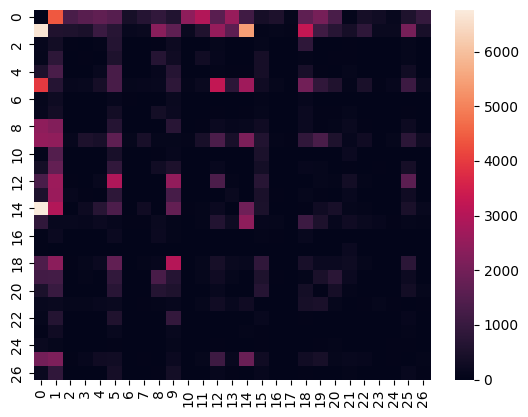

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(N)
plt.show()

In [ ]:
N[0,:]

In [ ]:
p = N[0].float()
p = p/torch.sum(N[0])
p

In [ ]:
# sample an index based on the probability distibution 'p'
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()

In [ ]:
## Make a distribution matrix using N

P = N.float()
P = P/P.sum(1,keepdims=True)
P.shape

In [17]:
## sampling characters form the matrix N
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  ix = 0
  out = []
  while True:
    p = P[ix]
    ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break

  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [ ]:
log_likelihood=0.0
n=0
for w in words[:3]:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    p = P[ix1,ix2]
    logprob = torch.log(p) # log prob is the individual probs
    n+=1
    log_likelihood+=logprob
    print(f"{ch1}{ch2}: {p:.4f} {logprob:.4f}")

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll/n=}')

In [ ]:
# creating the dataset for bigrams
xs,ys = [],[]
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("Number of samples",num)

In [ ]:
xs

In [ ]:
ys

In [ ]:
# one hot encoding each integer input because integers cannot be used directly as inputs
xenc = F.one_hot(xs,num_classes=27).float()
xenc.shape

In [ ]:
xenc.shape

In [ ]:
# defining/initializing the neuron

W = torch.randn((27,27))
logits = xenc@W # interpret them as log counts instead of just counts
counts = logits.exp() # counts like N
prob = counts/counts.sum(1,keepdim=True) # counts normalized
prob

In [25]:
# forward pass
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True) # weight matrix for num_in,num_out

In [ ]:
xenc = F.one_hot(xs,num_classes=27).float() # input to the neural net, one hot encoded
logits = xenc@W # matrix mul ie W*x
prob = F.softmax(logits,dim=-1) # prob distribution ie the final output dist
loss = -prob[torch.arange(xs.shape[0]),ys].log().mean() # negative loss likelihood
print(loss)

In [27]:
# backward pass
W.grad = None # setting grad to 0
loss.backward()

In [28]:
W.data+= -0.1*W.grad

In [ ]:
# gradient descent

for k in range(100):
  xenc = F.one_hot(xs,num_classes=27).float() # input to the neural net, one hot encoded
  logits = xenc@W # matrix mul ie W*x
  prob = F.softmax(logits,dim=-1) # prob distribution ie the final output dist
  loss = -prob[torch.arange(num),ys].log().mean() + 0.01*(W**2).mean() # negative log likelihood + regularizaton
  print(loss.item())
  W.grad = None # setting grad to 0
  loss.backward()
  W.data+= -45*W.grad

In [30]:
# sampling from the neural net
g = torch.Generator().manual_seed(21474837)

for i in range(5):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
    logits = xenc@W
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdim=True)
    ix = torch.multinomial(probs,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break

  print("".join(out))

heyeuthaikyn.
korana.
cebustt.
arynnalale.
zs.
